In [1]:
from connect_four_env.connect_four_env import ConnectFourGymEnv

In [2]:
env = ConnectFourGymEnv()

In [3]:
env._take_action(-1, 2)
env._take_action(1, 2)
env._take_action(-1, 2)
env._take_action(1, 4)

0

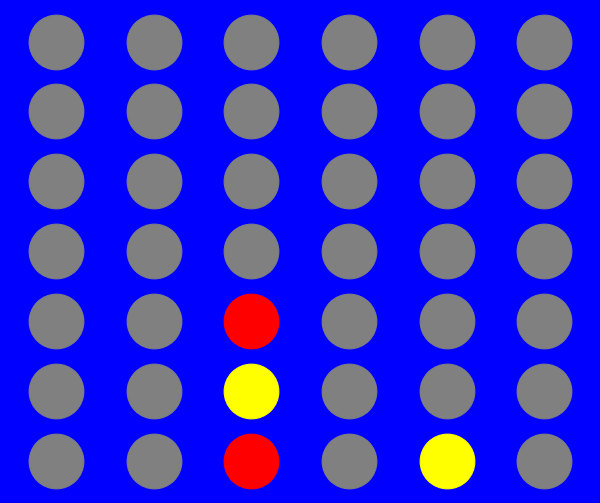

In [8]:
env.render(slot_size=3000)